# Adidas Sales

## Table of Contents

#### - Import libraries and Data
#### - Colored Correlation Matrix Heatmap
#### - Scatterplots
#### - Pairplot
#### - Categorical Plot
#### - Revist questions
#### - Hypothesis

### Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Create path
path = r'/Users/rusamijan/04-2023 Adidas Sales Analysis'

In [5]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ad_cleaned.pkl'))

In [6]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50%,In-store
1,Foot Locker,1185732,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30%,In-store
2,Foot Locker,1185732,1/3/20,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35%,In-store
3,Foot Locker,1185732,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732,1/5/20,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30%,In-store


### Exploring relationships

In [7]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [8]:
#creating a subset of the data to check for correlations
df_cor=df[['Retailer', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Sales Method']]

In [9]:
df_cor.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1/1/20,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,In-store
1,Foot Locker,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,In-store
2,Foot Locker,1/3/20,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,In-store
3,Foot Locker,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,In-store
4,Foot Locker,1/5/20,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,In-store


In [10]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice Date      9648 non-null   object 
 2   Region            9648 non-null   object 
 3   State             9648 non-null   object 
 4   City              9648 non-null   object 
 5   Product           9648 non-null   object 
 6   Price per Unit    9648 non-null   float64
 7   Units Sold        9648 non-null   float64
 8   Total Sales       9648 non-null   float64
 9   Operating Profit  9648 non-null   float64
 10  Sales Method      9648 non-null   object 
dtypes: float64(4), object(7)
memory usage: 829.2+ KB


In [11]:
### Creating Correlation Heatmap 

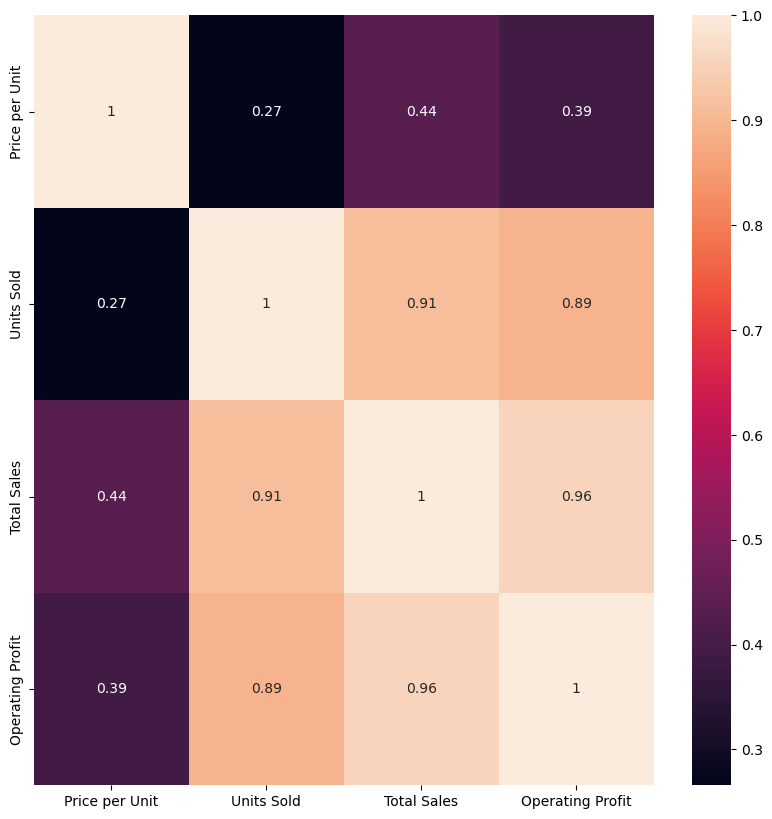

In [12]:
# Create a subplot with matplotlib 2
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_cor.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Black equates to 0, or no relationship between the variables, dark purple and black equate to negative correlations, and orange and light orange equate to positive correlations.

Total Sales
With “Price per Unit”: A 0.44 coefficient indicates a weak correlation. 
With “Units Sold”: A 0.91 coefficient indicates a strong positive correlation.  
With “Operating Profit”: A 0.96 coefficient indicates a very strong positive correlation.

In [13]:
### Scatterplots

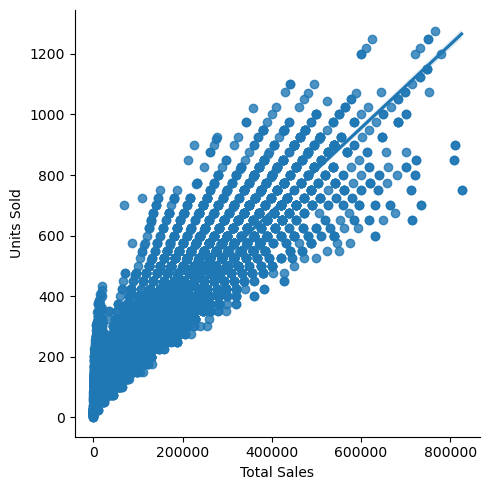

In [14]:
sns.lmplot(x = 'Total Sales', y = 'Units Sold', data = df)

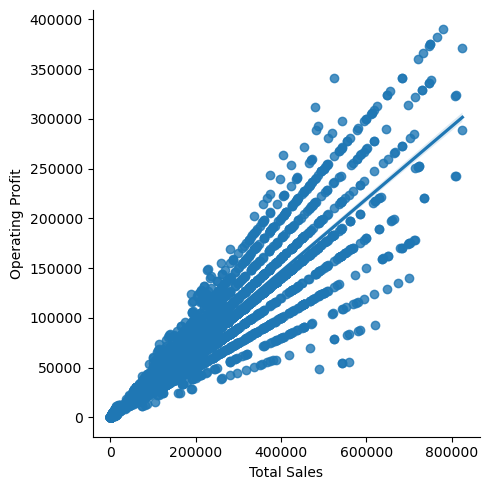

In [15]:
sns.lmplot(x = 'Total Sales', y = 'Operating Profit', data = df)

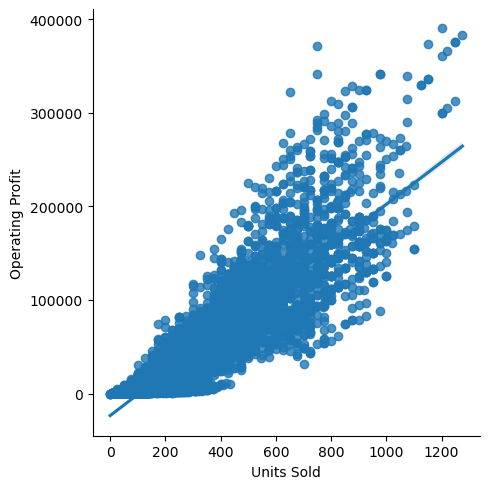

In [16]:
sns.lmplot(x = 'Units Sold', y = 'Operating Profit', data = df)

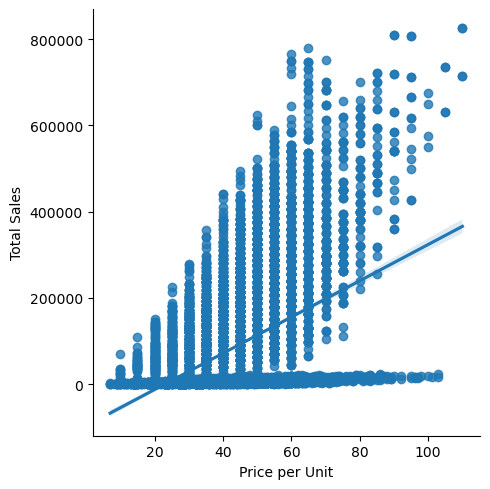

In [17]:
sns.lmplot(x = 'Price per Unit', y = 'Total Sales', data = df)

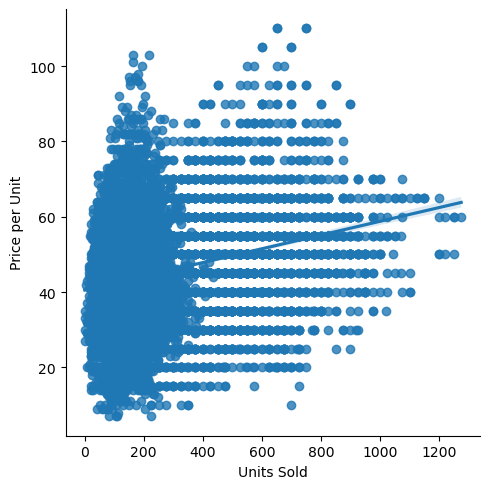

In [18]:
sns.lmplot(x = 'Units Sold', y = 'Price per Unit', data = df)

### Pair Plots

In [19]:
#creating a subset of the data to check for correlations
sub=df[['Retailer', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Sales Method']]

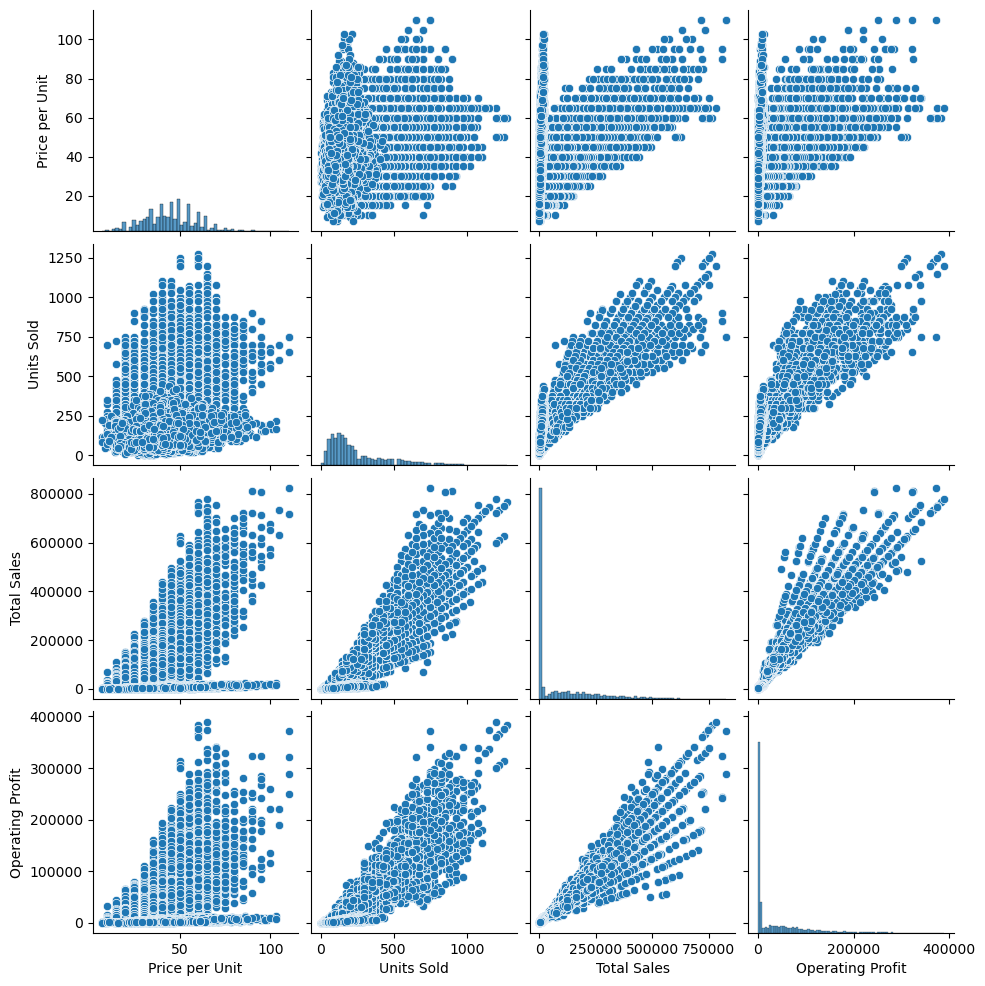

In [20]:
# Create a pair plot 
g = sns.pairplot(sub)

At the first and second from the bottom row, the scatterplots look great. There are positive correlations between them.

### Categorical Plot

<AxesSubplot:xlabel='Total Sales', ylabel='Count'>

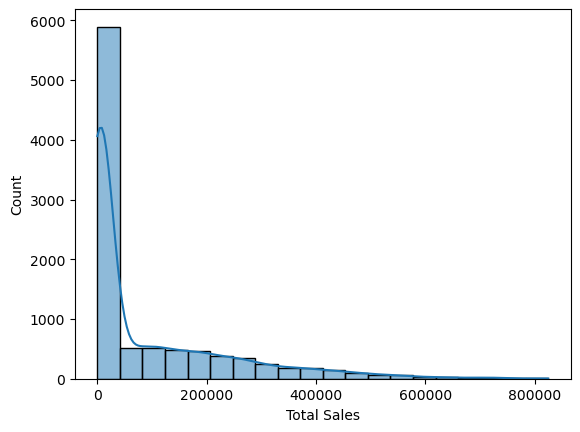

In [21]:
sns.histplot(sub['Total Sales'], bins = 20, kde = True)

<AxesSubplot:xlabel='Units Sold', ylabel='Count'>

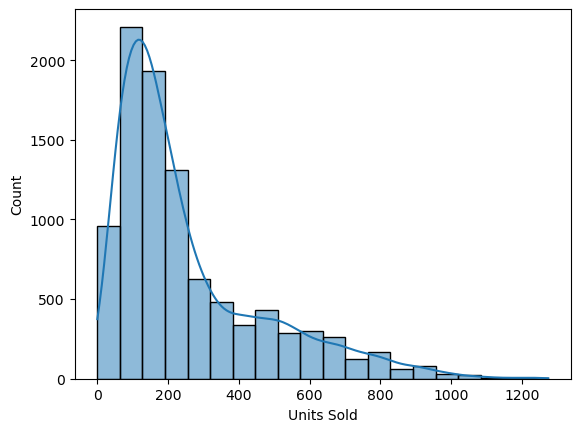

In [22]:
sns.histplot(sub['Units Sold'], bins = 20, kde = True)

<AxesSubplot:xlabel='Operating Profit', ylabel='Count'>

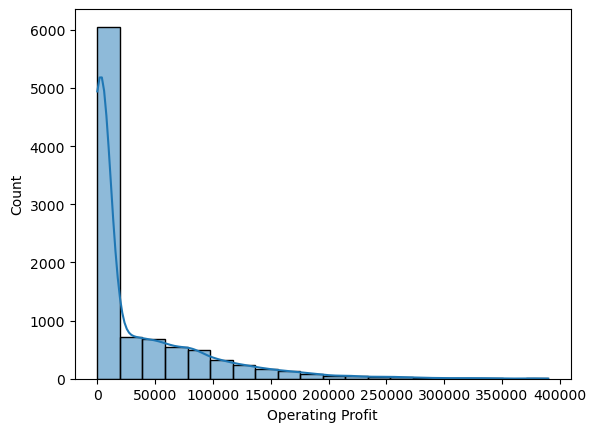

In [23]:
sns.histplot(sub['Operating Profit'], bins = 20, kde = True)

<AxesSubplot:xlabel='Price per Unit', ylabel='Count'>

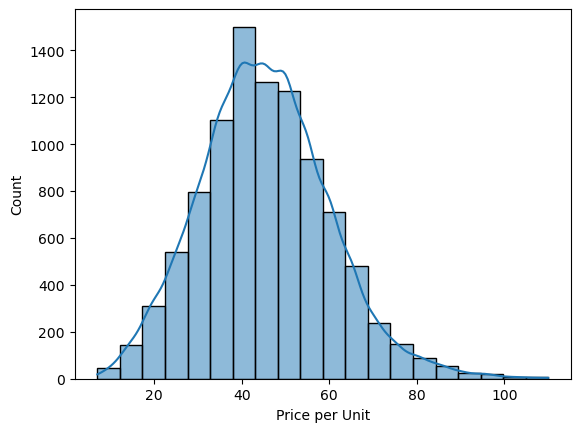

In [24]:
sns.histplot(sub['Price per Unit'], bins = 20, kde = True)

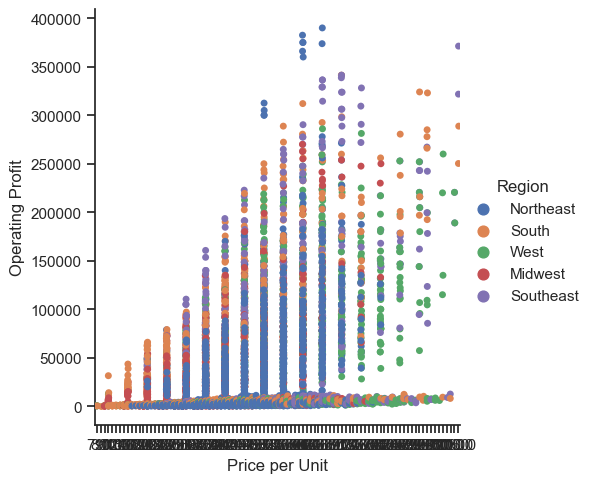

In [25]:
sns.set(style="ticks")
g = sns.catplot(x="Price per Unit", y="Operating Profit", hue="Region", data=sub)

Price per Unit vs Operating Profit across Region
Price per unit increase then Operating Profit also increase and in the south region then change to northeast

In [26]:
#sns.set(style="ticks")
#g = sns.catplot(x="Operating Profit", y="Total Sales", hue="Region", data=sub)

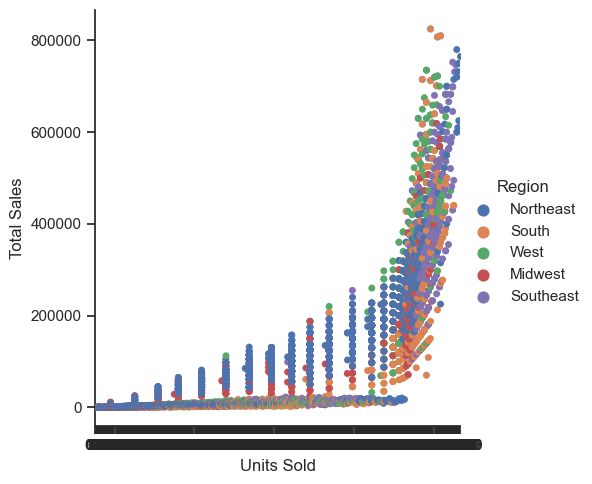

In [27]:
sns.set(style="ticks")
g = sns.catplot(x="Units Sold", y="Total Sales", hue="Region", data=sub)

Unit sold vs Total Sales across Region
Unit sold increase, the total sales also increase in the northeast. Look like it is stable and low at the south and southeast.

### Hypothesis

•	Which region has the most total sales?
•	Which product has the highest sales amount?
•	Which method sale make the most sale (in-store,  on online, outlet)?
•	Do retailers and regions have an impact on the total sales amount?

Which region has the most total sales? Northeast
Do retailers and regions have an impact on the total sales amount? right now i can answer that regions have an impact on the total sales amount